In [1]:
#for plot

import pandas as pd
import json
import numpy as np
import os
import seaborn as sns
from scipy.stats import sem
import matplotlib.pyplot as plt
%matplotlib inline

#for clean  data
from datetime import datetime
import dateutil
from dateutil import parser




In [2]:
clean_data = pd.read_csv("GameData.csv",index_col=0)

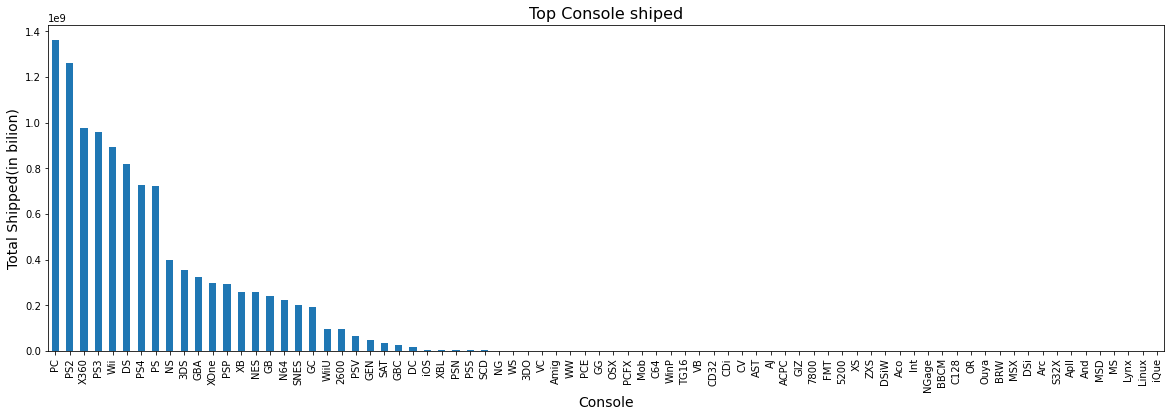

In [3]:
plt.figure(figsize=(20, 6))
clean_data.groupby('Console').Total_Shipped.sum().sort_values(ascending=False).plot.bar()
plt.title('Top Console shiped', fontsize=16)
plt.xlabel('Console', fontsize=14)
plt.ylabel('Total Shipped(in bilion)', fontsize=14)
plt.show()

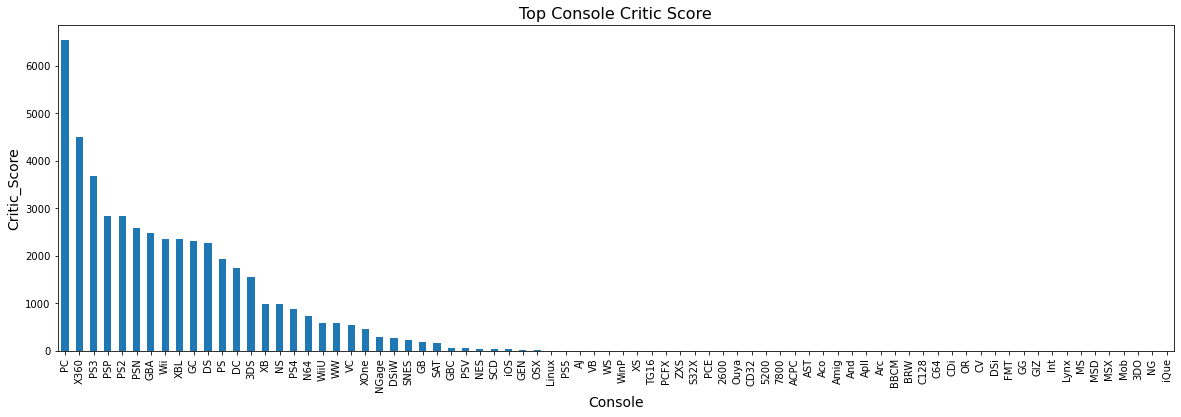

In [4]:
plt.figure(figsize=(20, 6))
clean_data.groupby('Console').Critic_Score.sum().sort_values(ascending=False).plot.bar()
plt.title('Top Console Critic Score', fontsize=16)
plt.xlabel('Console', fontsize=14)
plt.ylabel('Critic_Score', fontsize=14)
plt.show()

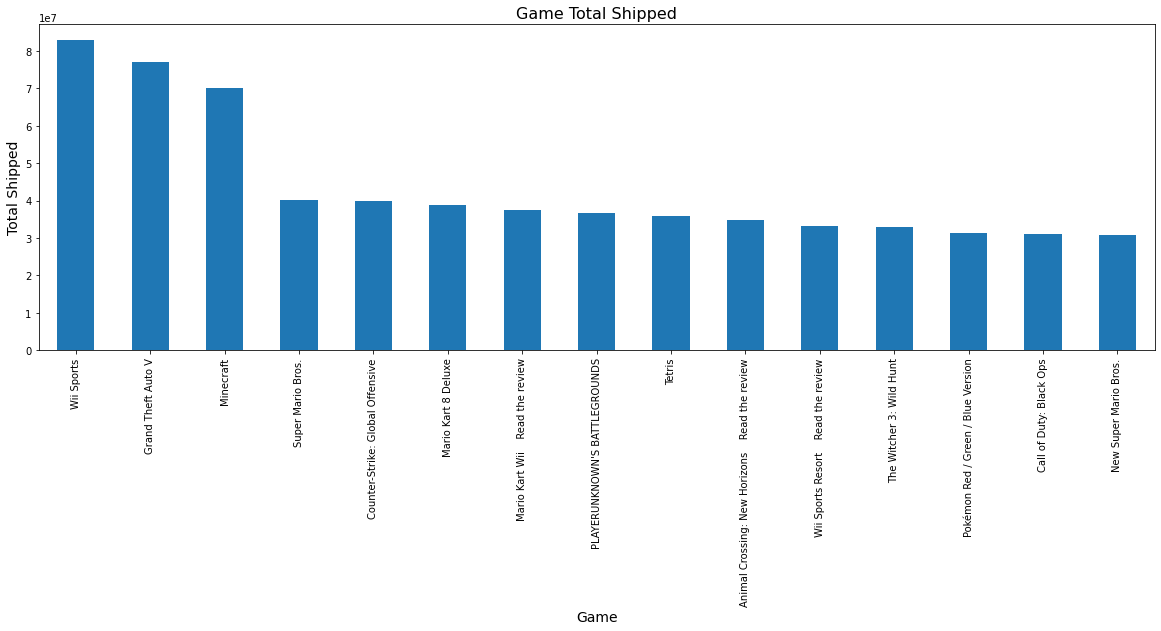

In [5]:
# Game total shipped
city_by_delay = clean_data.groupby('Game').Total_Shipped.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Game Total Shipped', fontsize=16)
plt.xlabel('Game', fontsize=14)
plt.ylabel('Total Shipped', fontsize=14)
plt.show()

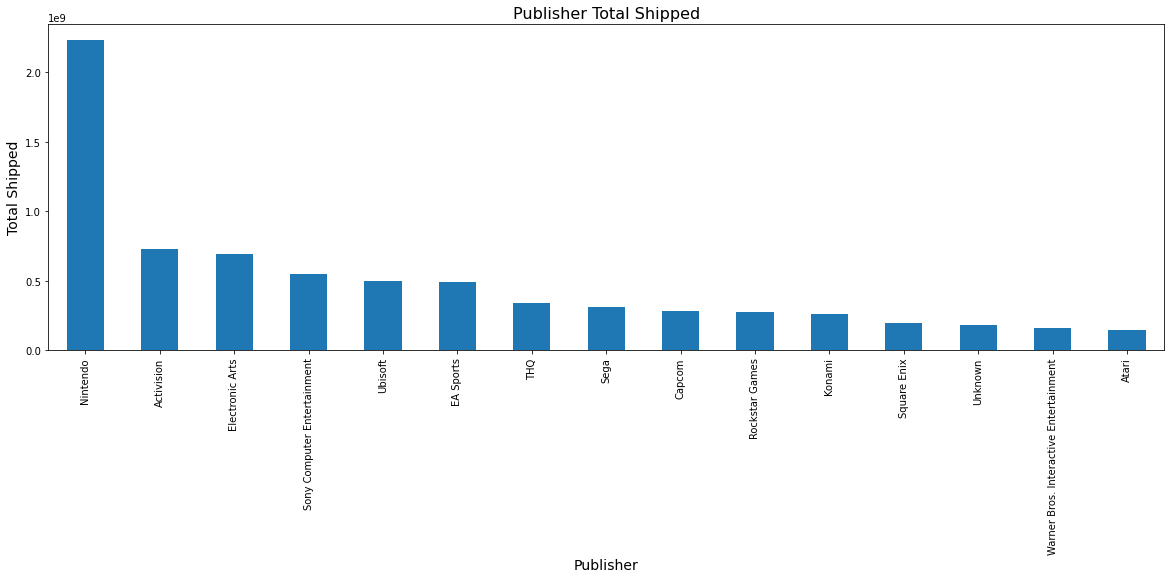

In [6]:
city_by_delay = clean_data.groupby('Publisher').Total_Shipped.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Publisher Total Shipped', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Total Shipped', fontsize=14)
plt.show()

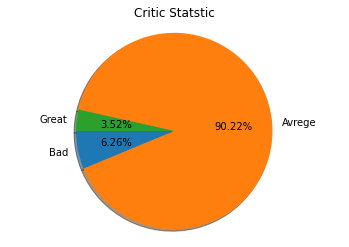

In [9]:
#pie graph on gmae critic
df_Bad = clean_data[clean_data['Critic_Score']<5].reset_index(drop=True)
df_Avrege = clean_data[(clean_data['Critic_Score']<8)].reset_index(drop=True)
df_Avrege = df_Avrege[(df_Avrege['Critic_Score']>=5)].reset_index(drop=True)
df_Great = clean_data[(clean_data['Critic_Score']>8)].reset_index(drop=True)
sizes = [len(df_Avrege)/len(clean_data)*100,len(df_Bad)/len(clean_data)*100,len(df_Great)/len(clean_data)*100]
labels = [ 'Bad','Avrege','Great']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',shadow=True, startangle=180)
ax1.axis('equal')  
plt.title('Critic Statstic')
plt.show()

<AxesSubplot:xlabel='Total_Shipped', ylabel='Critic_Score'>

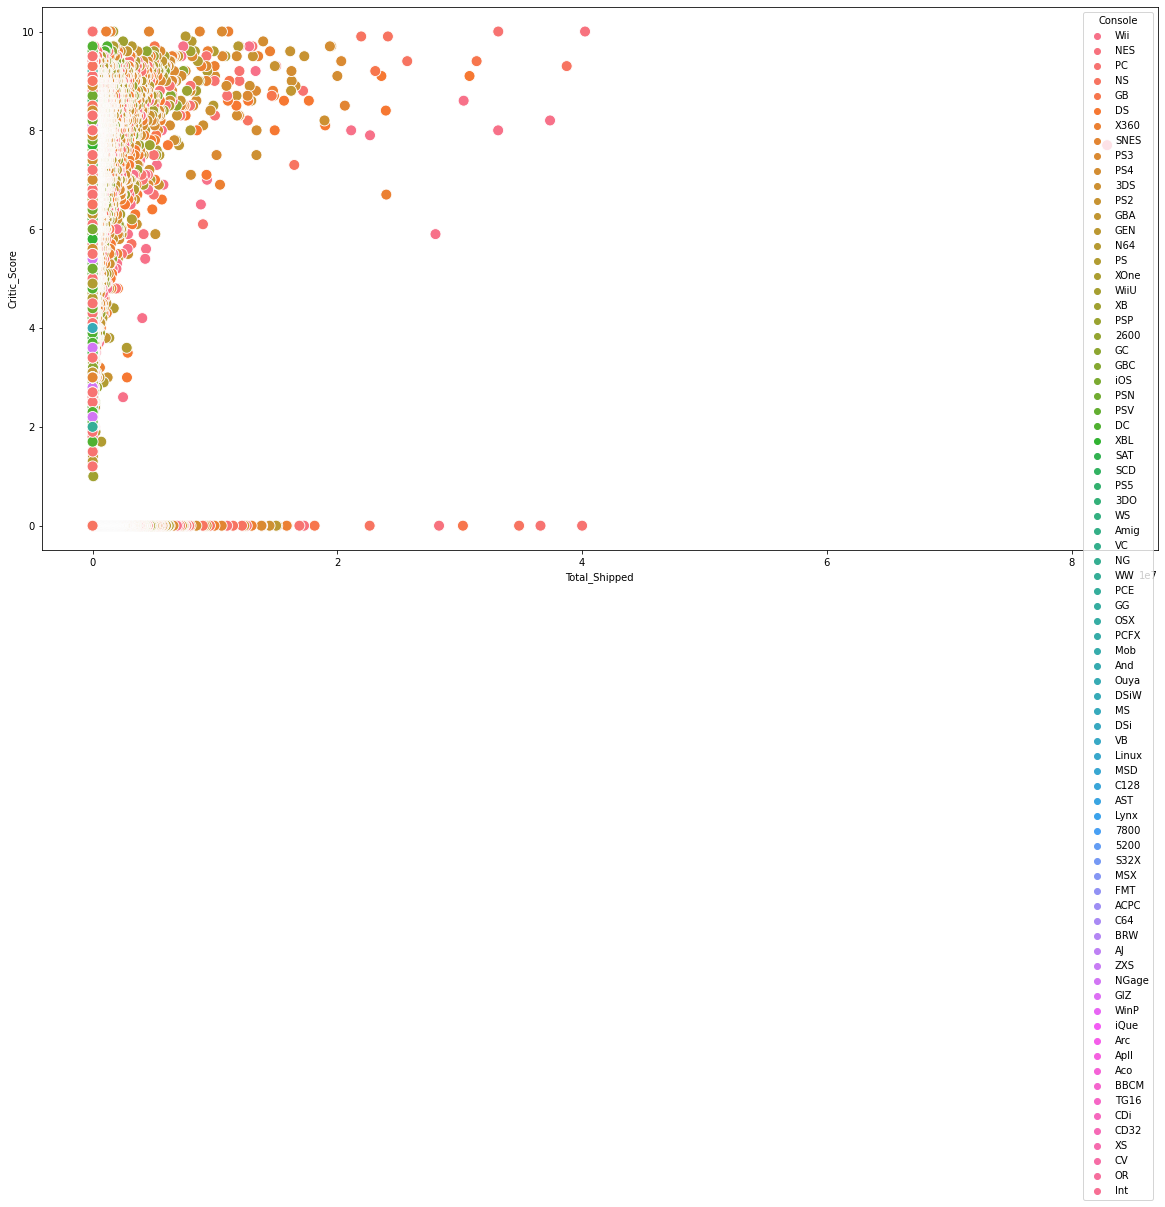

In [10]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x = 'Total_Shipped', y = 'Critic_Score',s=120, hue = 'Console', data = clean_data)

<AxesSubplot:xlabel='Total_Shipped', ylabel='Critic_Score'>

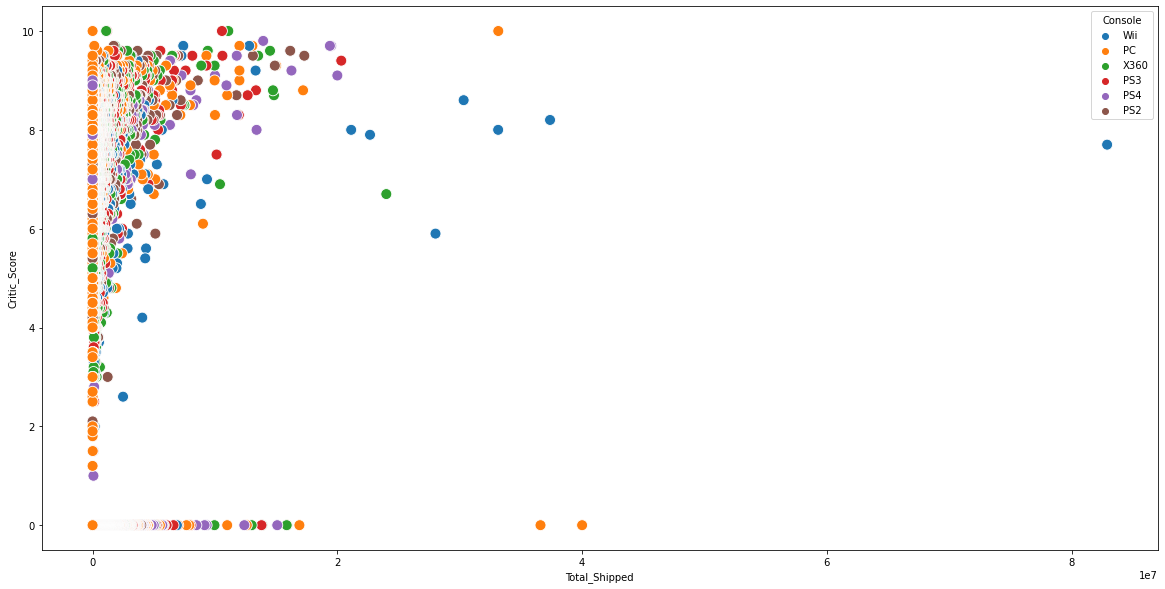

In [12]:
df_scatter=clean_data.copy()
df_scatter = df_scatter.drop(clean_data.index[~clean_data['Console'].isin(['Wii','PC','PS2','PS3','PS4','X360'])])
plt.figure(figsize=(20, 10))

sns.scatterplot(x = 'Total_Shipped', y = 'Critic_Score',s=120, hue = 'Console', data = df_scatter)
#Critic_Score
#Total_Shipped

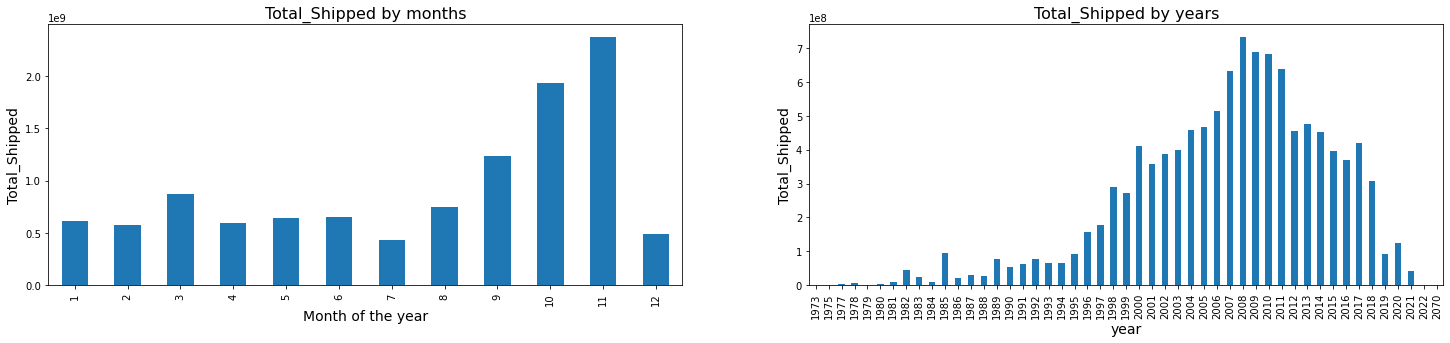

In [30]:
#change the variable to datetime and set only the month 
pd.to_datetime(clean_data.Release_Date)
clean_data['Release_Date_month'] = pd.to_datetime(clean_data['Release_Date']).dt.month
clean_data['Release_Date_month']


plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
clean_data.groupby('Release_Date_month').Total_Shipped.sum().plot.bar().set_title('Total_Shipped by months')
plt.title('Total_Shipped by months', fontsize=16)
plt.ylabel('Total_Shipped', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

clean_data['Release_Date_month'] = pd.to_datetime(clean_data['Release_Date']).dt.year
clean_data['Release_Date_month']

plt.subplot(2, 2 ,2)
clean_data.groupby('Release_Date_month').Total_Shipped.sum().plot.bar()
plt.title('Total_Shipped by years', fontsize=16)
plt.ylabel('Total_Shipped', fontsize=14)
plt.xlabel('year', fontsize=14)

plt.show()